# Describe the elevation of the star during the night

In [1]:
import urllib
import IPython.display
import numpy as np
import astropy

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimeDelta,TimezoneInfo

In [4]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [5]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [6]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Read the data from the fits file table


This file is a kind of logbook written in a fits format.
It includes the file number, the UTC time and the airmass for all the HD158485_grat_1-132
during the night 2016-05-11-12

In [8]:
tablefile_HD158485_PSF_with_AM='HD158485_grat_1-132_TablePSF_night20160511_withAM.fits'

In [9]:
t = Table.read(tablefile_HD158485_PSF_with_AM)

In [10]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay,azimuth,altitude,airmass
,,,,,,,,,,,deg,deg,
1,AssScImHD158485_grat_1.fits,2016-05-12T04:08:27.322,5.0,1,4.47415632464,4.32646900741,0.0,0.0,4.22360357046,4.08418674299,38.317046414,34.0317973678,1.78682177288
2,AssScImHD158485_grat_2.fits,2016-05-12T04:10:10.602,5.0,5,4.23915877347,4.09248732084,0.392718231946,0.18464392513,4.00176588215,3.86330803087,38.3781306161,34.2506080516,1.77678688395
3,AssScImHD158485_grat_3.fits,2016-05-12T04:10:20.458,5.0,21,3.76020655028,3.81432116694,0.235852244067,0.767497075115,3.54963498347,3.60071918159,38.3838874334,34.271504474,1.77583579663
4,AssScImHD158485_grat_4.fits,2016-05-12T04:10:29.432,5.0,21,3.56680321661,3.96483104307,0.181167115677,0.648766625551,3.36706223648,3.74280050466,38.3891180689,34.2905332072,1.77497080661
5,AssScImHD158485_grat_5.fits,2016-05-12T04:10:38.586,5.0,10,3.54780685321,3.54182907249,0.394432864272,0.769873402452,3.34912966943,3.34348664443,38.3944427983,34.3099458746,1.77408943351
6,AssScImHD158485_grat_6.fits,2016-05-12T04:10:47.541,5.0,23,3.5644327671,3.49984527018,0.199997271512,0.77663355496,3.36482453215,3.30385393505,38.39964119,34.3289387283,1.77322816438
7,AssScImHD158485_grat_7.fits,2016-05-12T04:10:56.526,5.0,33,3.40986449559,3.42051094206,0.21440035444,0.74200994629,3.21891208384,3.2289623293,38.4048464703,34.3479973927,1.7723649468
8,AssScImHD158485_grat_8.fits,2016-05-12T04:11:05.546,5.0,15,3.31082909982,3.41278053444,0.287048747871,0.315149038754,3.12542267023,3.22166482451,38.4100614141,34.3671324928,1.77149930943
9,AssScImHD158485_grat_9.fits,2016-05-12T04:11:14.644,5.0,20,3.66129988733,3.56658136927,0.372296084714,0.601672154467,3.45626709364,3.36685281259,38.4153106745,34.3864352857,1.77062714222


In [11]:
all_airmass=t['airmass']
all_num=t['num']
all_times=Time(t['time'])

## Define Coordinates Systems

In [12]:
hd_158485_starloc=astropy.coordinates.SkyCoord.from_name('HD158485')

In [13]:
from astropy.coordinates import Longitude, Latitude
NOFS_Longitude=Longitude(u'-111°44′25″') 
NOFS_Latitude=Latitude(u'35°11′03″')
NOFS_Height=2.273*u.m 

In [14]:
#definition of the location to astropy
NOFS_location = astropy.coordinates.EarthLocation(lat=NOFS_Latitude, lon=NOFS_Longitude, height=NOFS_Height)

In [15]:
from astropy.coordinates import get_sun
utcoffset=utcoffset = -7*u.hour  # Mountain  Daylight Time
midnight = Time('2016-5-12 00:00:00') - utcoffset # midnight i UTC

delta_midnight_object_day=all_times-midnight

delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_May11_to_12 = midnight + delta_midnight
frame_May11_to_12 = AltAz(obstime=times_May11_to_12, location=NOFS_location)

sunaltazs_May11_to_12 = get_sun(times_May11_to_12).transform_to(frame_May11_to_12)

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


In [16]:
delta_midnight_object_hour=delta_midnight_object_day.to('hour')
delta_midnight_object_hour

<Quantity [-2.85907722,-2.83038833,-2.82765056,-2.82515778,-2.822615  ,
           -2.8201275 ,-2.81763167,-2.81512611,-2.81259889,-2.81009222,
           -2.80759417,-2.80506528,-2.802545  ,-2.80002833,-2.79750694,
           -2.79499222,-2.79247472,-2.78997389,-2.78746972,-2.78497528,
           -2.782455  ,-1.56677528,-1.56406333,-1.56152917,-1.55902056,
           -1.55651972,-1.55401528,-1.55150528,-1.54901194,-1.54649694,
           -1.54399917,-1.53272778,-1.531015  ,-1.52964944,-1.52827278,
           -1.52676056,-1.52542083,-1.52404306,-1.52260417,-1.52128639,
           -1.51976306,-1.50645222,-1.50509333,-1.50387472,-1.50265139,
           -1.50143722,-1.50021139,-1.49900972,-1.49776778,-1.49656444,
           -1.49533806,-0.18292111,-0.17864333,-0.17611417,-0.17361639,
           -0.17113222,-0.16861389,-0.16609778,-0.16357889,-0.16107167,
           -0.15859083,-0.15609306,-0.15315611,-0.15159417,-0.15023583,
           -0.148785  ,-0.14726611,-0.14548056,-0.14451917,-0.14

In [17]:
hd_158485_altazs_May11_to_12 = hd_158485_starloc.transform_to(frame_May11_to_12 )

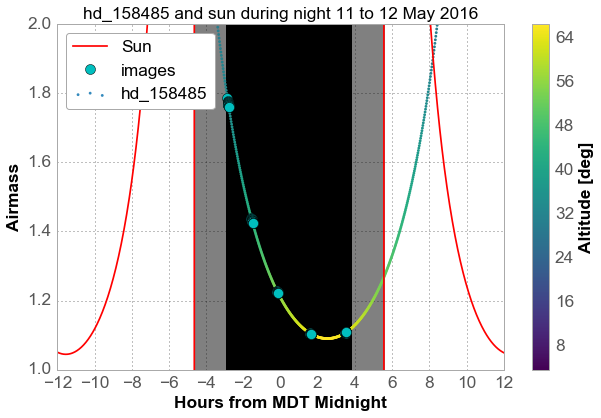

In [18]:
plt.figure(figsize=(10.,6.))
plt.plot(delta_midnight, sunaltazs_May11_to_12.secz, color='r', label='Sun')
plt.plot(delta_midnight_object_hour,all_airmass,marker='o',markersize='10',color='c',linestyle='None',label='images')
plt.scatter(delta_midnight, hd_158485_altazs_May11_to_12.secz,
            c=hd_158485_altazs_May11_to_12.alt, label='hd_158485', lw=0, s=8,
            cmap='viridis')

# plot astronomical twillight
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May11_to_12.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May11_to_12.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Altitude [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(1., 2.)
plt.title('hd_158485 and sun during night 11 to 12 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass')
plt.savefig('hd_158485_airmass_night20160511.pdf')
plt.show()

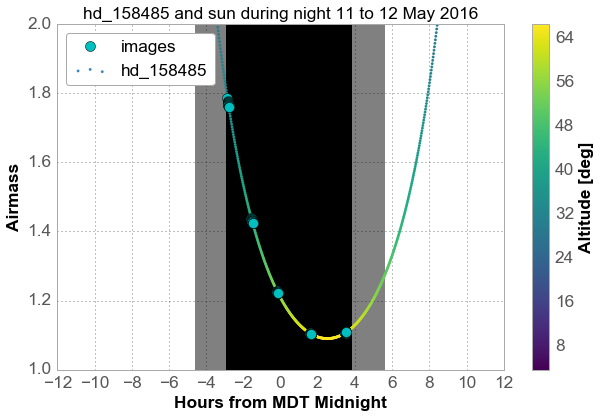

In [20]:
plt.figure(figsize=(10.,6.))
#plt.plot(delta_midnight, sunaltazs_May11_to_12.secz, color='r', label='Sun')
plt.plot(delta_midnight_object_hour,all_airmass,marker='o',markersize='10',color='c',linestyle='None',label='images')
plt.scatter(delta_midnight, hd_158485_altazs_May11_to_12.secz,
            c=hd_158485_altazs_May11_to_12.alt, label='hd_158485', lw=0, s=8,
            cmap='viridis')

# plot astronomical twillight
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May11_to_12.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May11_to_12.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Altitude [deg]')
plt.legend(loc='upper left')
plt.xlim(-6, 6)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(1., 2.)
plt.title('hd_158485 and sun during night 11 to 12 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass')
plt.savefig('hd_158485_airmass_night20160511_cut.pdf')
plt.show()